In [3]:
import sys
print(sys.executable)

/opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/bin/python


In [4]:
!{sys.executable} -m pip install kagglehub

In [5]:
!/opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/bin/python -m pip install --upgrade pip

In [6]:
import kagglehub

path = kagglehub.dataset_download("ayushtankha/hackathon")

print("Path to dataset files:", path)

/opt/homebrew/Cellar/jupyterlab/4.3.4_1/libexec/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/gama/.cache/kagglehub/datasets/ayushtankha/hackathon/versions/1


In [7]:
import os

files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['weather_data.csv', 'waiting_times.csv', 'parade_night_show.xlsx', 'glossary.xlsx', 'entity_schedule.csv', 'link_attraction_park.csv', 'attendance.csv']


In [8]:
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install openpyxl

In [9]:
# ['weather_data.csv', 'waiting_times.csv', 'parade_night_show.xlsx', 'glossary.xlsx', 'entity_schedule.csv', 'link_attraction_park.csv', 'attendance.csv']
import pandas as pd

df_weather = pd.read_csv(os.path.join(path, "weather_data.csv"))
print(df_weather.head(10))
df_weather.shape

          dt                         dt_iso  timezone        city_name  \
0  915148800  1999-01-01 00:00:00 +0000 UTC      3600  Custom location   
1  915152400  1999-01-01 01:00:00 +0000 UTC      3600  Custom location   
2  915156000  1999-01-01 02:00:00 +0000 UTC      3600  Custom location   
3  915159600  1999-01-01 03:00:00 +0000 UTC      3600  Custom location   
4  915163200  1999-01-01 04:00:00 +0000 UTC      3600  Custom location   
5  915166800  1999-01-01 05:00:00 +0000 UTC      3600  Custom location   
6  915170400  1999-01-01 06:00:00 +0000 UTC      3600  Custom location   
7  915174000  1999-01-01 07:00:00 +0000 UTC      3600  Custom location   
8  915177600  1999-01-01 08:00:00 +0000 UTC      3600  Custom location   
9  915181200  1999-01-01 09:00:00 +0000 UTC      3600  Custom location   

         lat       lon  temp  visibility  dew_point  feels_like  ...  \
0  48.873492  2.295104  8.33         NaN       3.39        5.28  ...   
1  48.873492  2.295104  8.08         NaN 

(207264, 28)

In [10]:
print(df_weather['dt'].nunique(),df_weather['dt_iso'].nunique(),df_weather['timezone'].nunique(),df_weather['city_name'].nunique())

207264 207264 2 1


In [11]:
df_weather['timezone'].value_counts()

timezone
7200    121871
3600     85393
Name: count, dtype: int64

In [12]:
print(df_weather['lat'].nunique(),df_weather['lon'].nunique(),df_weather['temp'].nunique(),df_weather['visibility'].nunique())

1 1 4333 0


In [13]:
print(df_weather['dew_point'].nunique(),df_weather['feels_like'].nunique(),df_weather['wind_gust'].nunique(),df_weather['rain_1h'].nunique())

3414 4939 75 469


In [14]:
print(df_weather['rain_1h'].nunique(),df_weather['rain_3h'].nunique(),df_weather['snow_1h'].nunique(),df_weather['snow_3h'].nunique())

469 8 165 0


In [15]:
print(df_weather['clouds_all'].nunique(),df_weather['weather_id'].nunique(),df_weather['weather_main'].nunique(),df_weather['weather_description'].nunique())

101 10 4 10


In [33]:
print(df_weather['sea_level'].nunique(),df_weather['grnd_level'].nunique(),df_weather['humidity'].nunique(),df_weather['wind_speed'].nunique())

0 0 95 1220


In [34]:
print(df_weather['wind_deg'].nunique())

361


In [16]:
df_weather['weather_main'].value_counts()

weather_main
Clouds    143763
Clear      33392
Rain       28956
Snow        1153
Name: count, dtype: int64

In [35]:
# delete meanless columns
df_weather1 = df_weather.drop(['dt', 'lat', 'lon', 'visibility', 'snow_3h', 'weather_description', 'weather_icon', 'city_name',
                              'sea_level', 'grnd_level'], axis=1)

print(df_weather1.head(10))

                          dt_iso  timezone  temp  dew_point  feels_like  \
0  1999-01-01 00:00:00 +0000 UTC      3600  8.33       3.39        5.28   
1  1999-01-01 01:00:00 +0000 UTC      3600  8.08       3.54        5.18   
2  1999-01-01 02:00:00 +0000 UTC      3600  8.08       4.11        5.38   
3  1999-01-01 03:00:00 +0000 UTC      3600  7.31       3.73        4.42   
4  1999-01-01 04:00:00 +0000 UTC      3600  6.91       3.53        4.00   
5  1999-01-01 05:00:00 +0000 UTC      3600  5.45       2.46        2.35   
6  1999-01-01 06:00:00 +0000 UTC      3600  5.63       3.14        2.57   
7  1999-01-01 07:00:00 +0000 UTC      3600  5.64       3.32        2.38   
8  1999-01-01 08:00:00 +0000 UTC      3600  5.99       3.83        2.69   
9  1999-01-01 09:00:00 +0000 UTC      3600  6.72       4.21        3.42   

   temp_min  temp_max  pressure  humidity  wind_speed  wind_deg  wind_gust  \
0      8.14      9.32      1006        71        5.57       152        NaN   
1      7.94      9

In [36]:
df_weather1.dtypes

dt_iso           object
timezone          int64
temp            float64
dew_point       float64
feels_like      float64
temp_min        float64
temp_max        float64
pressure          int64
humidity          int64
wind_speed      float64
wind_deg          int64
wind_gust       float64
rain_1h         float64
rain_3h         float64
snow_1h         float64
clouds_all        int64
weather_id        int64
weather_main     object
dtype: object

In [37]:
df_weather1['dt'] = pd.to_datetime(df_weather1['dt_iso'].str.replace(' UTC', '', regex=False))
df_weather1['tz_offset'] = pd.to_timedelta(df_weather1['timezone'], unit='s')

print(df_weather1.head(10))

                          dt_iso  timezone  temp  dew_point  feels_like  \
0  1999-01-01 00:00:00 +0000 UTC      3600  8.33       3.39        5.28   
1  1999-01-01 01:00:00 +0000 UTC      3600  8.08       3.54        5.18   
2  1999-01-01 02:00:00 +0000 UTC      3600  8.08       4.11        5.38   
3  1999-01-01 03:00:00 +0000 UTC      3600  7.31       3.73        4.42   
4  1999-01-01 04:00:00 +0000 UTC      3600  6.91       3.53        4.00   
5  1999-01-01 05:00:00 +0000 UTC      3600  5.45       2.46        2.35   
6  1999-01-01 06:00:00 +0000 UTC      3600  5.63       3.14        2.57   
7  1999-01-01 07:00:00 +0000 UTC      3600  5.64       3.32        2.38   
8  1999-01-01 08:00:00 +0000 UTC      3600  5.99       3.83        2.69   
9  1999-01-01 09:00:00 +0000 UTC      3600  6.72       4.21        3.42   

   temp_min  temp_max  pressure  humidity  wind_speed  wind_deg  wind_gust  \
0      8.14      9.32      1006        71        5.57       152        NaN   
1      7.94      9

In [38]:
df_weather1.dtypes

dt_iso                       object
timezone                      int64
temp                        float64
dew_point                   float64
feels_like                  float64
temp_min                    float64
temp_max                    float64
pressure                      int64
humidity                      int64
wind_speed                  float64
wind_deg                      int64
wind_gust                   float64
rain_1h                     float64
rain_3h                     float64
snow_1h                     float64
clouds_all                    int64
weather_id                    int64
weather_main                 object
dt              datetime64[ns, UTC]
tz_offset           timedelta64[ns]
dtype: object

In [39]:
df_weather1['local_dt'] = df_weather1['dt'] + df_weather1['tz_offset']
df_weather2 = df_weather1.drop(['tz_offset'], axis=1)

print(df_weather2.head(10))

                          dt_iso  timezone  temp  dew_point  feels_like  \
0  1999-01-01 00:00:00 +0000 UTC      3600  8.33       3.39        5.28   
1  1999-01-01 01:00:00 +0000 UTC      3600  8.08       3.54        5.18   
2  1999-01-01 02:00:00 +0000 UTC      3600  8.08       4.11        5.38   
3  1999-01-01 03:00:00 +0000 UTC      3600  7.31       3.73        4.42   
4  1999-01-01 04:00:00 +0000 UTC      3600  6.91       3.53        4.00   
5  1999-01-01 05:00:00 +0000 UTC      3600  5.45       2.46        2.35   
6  1999-01-01 06:00:00 +0000 UTC      3600  5.63       3.14        2.57   
7  1999-01-01 07:00:00 +0000 UTC      3600  5.64       3.32        2.38   
8  1999-01-01 08:00:00 +0000 UTC      3600  5.99       3.83        2.69   
9  1999-01-01 09:00:00 +0000 UTC      3600  6.72       4.21        3.42   

   temp_min  temp_max  pressure  humidity  wind_speed  wind_deg  wind_gust  \
0      8.14      9.32      1006        71        5.57       152        NaN   
1      7.94      9

In [40]:
matching_indices = df_weather2[df_weather2['timezone'] == 7200].index[:20]
print(matching_indices)

Index([2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076,
       2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084],
      dtype='int64')


In [41]:
subset = df_weather2.iloc[2060:2070]

print(subset)

                             dt_iso  timezone  temp  dew_point  feels_like  \
2060  1999-03-27 20:00:00 +0000 UTC      3600  8.14       4.17        7.04   
2061  1999-03-27 21:00:00 +0000 UTC      3600  7.03       3.46        5.42   
2062  1999-03-27 22:00:00 +0000 UTC      3600  6.24       2.51        4.08   
2063  1999-03-27 23:00:00 +0000 UTC      3600  6.06       2.52        3.64   
2064  1999-03-28 00:00:00 +0000 UTC      3600  4.85       1.87        2.16   
2065  1999-03-28 01:00:00 +0000 UTC      7200  5.02       2.55        2.37   
2066  1999-03-28 02:00:00 +0000 UTC      7200  4.10       2.29        1.19   
2067  1999-03-28 03:00:00 +0000 UTC      7200  3.44       2.11        0.41   
2068  1999-03-28 04:00:00 +0000 UTC      7200  2.97       1.80       -0.10   
2069  1999-03-28 05:00:00 +0000 UTC      7200  2.14       0.98       -1.14   

      temp_min  temp_max  pressure  humidity  wind_speed  wind_deg  wind_gust  \
2060      7.94      8.74      1008        76        1.98    

In [42]:
df_weather2['dt_iso'].is_unique

True

In [43]:
df_weather2['local_dt'].is_unique

False

In [54]:
duplicates = df_weather2[df_weather2['local_dt'].duplicated(keep=False)]
print(duplicates.head(10))

                              dt_iso  timezone   temp  dew_point  feels_like  \
7272   1999-10-31 00:00:00 +0000 UTC      7200  11.18       9.44       10.68   
7273   1999-10-31 01:00:00 +0000 UTC      3600  10.65       8.91       10.09   
16008  2000-10-29 00:00:00 +0000 UTC      7200  10.42       7.48        9.66   
16009  2000-10-29 01:00:00 +0000 UTC      3600   9.87       7.12        6.91   
24744  2001-10-28 00:00:00 +0000 UTC      7200  11.56      11.41       11.36   
24745  2001-10-28 01:00:00 +0000 UTC      3600  11.15      10.85       10.88   
33480  2002-10-27 00:00:00 +0000 UTC      7200  12.98      10.16       12.50   
33481  2002-10-27 01:00:00 +0000 UTC      3600  13.75      11.10       13.37   
42216  2003-10-26 00:00:00 +0000 UTC      7200   5.56       3.24        2.57   
42217  2003-10-26 01:00:00 +0000 UTC      3600   5.49       3.34        2.42   

       temp_min  temp_max  pressure  humidity  wind_speed  wind_deg  \
7272      10.54     11.50      1017        89   

In [60]:
# dt_iso                       object
# timezone                      int64
# temp                        float64
# dew_point                   float64
# feels_like                  float64
# temp_min                    float64
# temp_max                    float64
# pressure                      int64
# humidity                      int64
# wind_speed                  float64
# wind_deg                      int64
# wind_gust                   float64
# rain_1h                     float64
# rain_3h                     float64
# snow_1h                     float64
# clouds_all                    int64
# weather_id                    int64
# weather_main                 object

df_weather3 = df_weather2.groupby(df_weather2['dt'].dt.date).agg({
    'temp': ['mean', 'max', 'min'],
    'dew_point': 'mean',
    'feels_like': ['mean', 'max', 'min'],
    'pressure': 'mean',
    'wind_speed': 'mean',
    'humidity': 'mean'
})
df_weather3.columns = ['_'.join(col) for col in df_weather3.columns]
df_weather3.reset_index(inplace=True)
df_weather3.rename(columns={'index': 'date'}, inplace=True)
df_weather3['dt'] = pd.to_datetime(df_weather3['dt'])

print(df_weather3.head(10))

          dt  temp_mean  temp_max  temp_min  dew_point_mean  feels_like_mean  \
0 1999-01-01   7.954167     12.09      5.45        5.119583         5.552500   
1 1999-01-02   7.442500      9.72      5.26        5.566667         3.710833   
2 1999-01-03   7.706250     12.02      4.74        4.866667         4.600833   
3 1999-01-04  12.067500     13.98      7.53       11.055417        11.342083   
4 1999-01-05  11.275833     15.91      7.66        9.308750        10.225833   
5 1999-01-06   9.134167     14.70      4.57        6.945417         7.274167   
6 1999-01-07   8.413333      9.66      6.97        6.896667         6.012083   
7 1999-01-08   6.854167      7.91      5.28        5.181250         3.547083   
8 1999-01-09   4.029167      6.07      0.34        2.337500         0.815833   
9 1999-01-10   0.058750      1.40     -1.65       -1.389167        -4.417083   

   feels_like_max  feels_like_min  pressure_mean  wind_speed_mean  \
0           11.34            2.35    1009.166667  

In [61]:
df_weather3.dtypes

dt                 datetime64[ns]
temp_mean                 float64
temp_max                  float64
temp_min                  float64
dew_point_mean            float64
feels_like_mean           float64
feels_like_max            float64
feels_like_min            float64
pressure_mean             float64
wind_speed_mean           float64
humidity_mean             float64
dtype: object

In [32]:
df_nightshow = pd.read_excel(os.path.join(path, "parade_night_show.xlsx"))
print(df_nightshow.head(10))
df_nightshow.shape

   Unnamed: 0  WORK_DATE NIGHT_SHOW  PARADE_1  PARADE_2
0           0 2018-10-01   20:00:00  17:30:00  12:10:00
1           1 2018-10-02   20:00:00  17:30:00  12:10:00
2           2 2018-10-03   20:00:00  17:30:00  12:10:00
3           3 2018-10-04   20:00:00  17:30:00  12:10:00
4           4 2018-10-05   20:00:00  17:30:00  12:10:00
5           5 2018-10-06   22:00:00  17:30:00  12:10:00
6           6 2018-10-07   21:00:00  17:30:00  12:10:00
7           7 2018-10-08   20:00:00  17:30:00  12:10:00
8           8 2018-10-09   20:00:00  17:30:00  12:10:00
9           9 2018-10-10   20:00:00  17:30:00  12:10:00


(671, 5)

In [31]:
import pandas as pd

df_attraction = pd.read_csv(os.path.join(path, "link_attraction_park.csv"))
print(df_attraction.head(10))
df_attraction.shape

                     ATTRACTION;PARK
0      Aeroplane Ride;Tivoli Gardens
1     Bumper Cars;PortAventura World
2     Bungee Jump;PortAventura World
3    Circus Train;PortAventura World
4           Crazy Bus;Tivoli Gardens
5     Crazy Dance;PortAventura World
6   Dizzy Dropper;PortAventura World
7      Drop Tower;PortAventura World
8  Flying Coaster;PortAventura World
9       Free Fall;PortAventura World


(39, 1)

In [48]:
import pandas as pd

df_attendance = pd.read_csv(os.path.join(path, "attendance.csv"))
print(df_attendance.head(10))
df_attendance.shape

   USAGE_DATE       FACILITY_NAME  attendance
0  2018-06-01  PortAventura World       46804
1  2018-06-01      Tivoli Gardens       20420
2  2018-06-02  PortAventura World       57940
3  2018-06-02      Tivoli Gardens       29110
4  2018-06-03  PortAventura World       44365
5  2018-06-03      Tivoli Gardens       23727
6  2018-06-04  PortAventura World       37617
7  2018-06-04      Tivoli Gardens       15115
8  2018-06-05  PortAventura World       32438
9  2018-06-05      Tivoli Gardens       16373


(2367, 3)

In [37]:
df_attendance['FACILITY_NAME'].nunique()

2

In [69]:
print("Min:", df_attendance['USAGE_DATE'].min())
print("Max:", df_attendance['USAGE_DATE'].max())

Min: 2018-06-01
Max: 2022-07-26


In [50]:
df_tivoli = df_attendance[df_attendance['FACILITY_NAME'] == 'Tivoli Gardens'].reset_index(drop=True)

print(df_tivoli.head(10))

   USAGE_DATE   FACILITY_NAME  attendance
0  2018-06-01  Tivoli Gardens       20420
1  2018-06-02  Tivoli Gardens       29110
2  2018-06-03  Tivoli Gardens       23727
3  2018-06-04  Tivoli Gardens       15115
4  2018-06-05  Tivoli Gardens       16373
5  2018-06-06  Tivoli Gardens       15831
6  2018-06-07  Tivoli Gardens       16587
7  2018-06-08  Tivoli Gardens       16434
8  2018-06-09  Tivoli Gardens       25776
9  2018-06-10  Tivoli Gardens       34376


In [49]:
df_portaventura = df_attendance[df_attendance['FACILITY_NAME'] == 'PortAventura World'].reset_index(drop=True)

print(df_portaventura.head(10))

   USAGE_DATE       FACILITY_NAME  attendance
0  2018-06-01  PortAventura World       46804
1  2018-06-02  PortAventura World       57940
2  2018-06-03  PortAventura World       44365
3  2018-06-04  PortAventura World       37617
4  2018-06-05  PortAventura World       32438
5  2018-06-06  PortAventura World       28399
6  2018-06-07  PortAventura World       39436
7  2018-06-08  PortAventura World       36459
8  2018-06-09  PortAventura World       52664
9  2018-06-10  PortAventura World       47025


In [52]:
df_portaventura = df_portaventura.rename(columns={'USAGE_DATE': 'dt'})
df_tivoli = df_tivoli.rename(columns={'USAGE_DATE': 'dt'})
df_portaventura['dt'] = pd.to_datetime(df_portaventura['dt'])
df_tivoli['dt'] = pd.to_datetime(df_tivoli['dt'])

print(df_tivoli.head(10))
print(df_portaventura.head(10))

          dt   FACILITY_NAME  attendance
0 2018-06-01  Tivoli Gardens       20420
1 2018-06-02  Tivoli Gardens       29110
2 2018-06-03  Tivoli Gardens       23727
3 2018-06-04  Tivoli Gardens       15115
4 2018-06-05  Tivoli Gardens       16373
5 2018-06-06  Tivoli Gardens       15831
6 2018-06-07  Tivoli Gardens       16587
7 2018-06-08  Tivoli Gardens       16434
8 2018-06-09  Tivoli Gardens       25776
9 2018-06-10  Tivoli Gardens       34376
          dt       FACILITY_NAME  attendance
0 2018-06-01  PortAventura World       46804
1 2018-06-02  PortAventura World       57940
2 2018-06-03  PortAventura World       44365
3 2018-06-04  PortAventura World       37617
4 2018-06-05  PortAventura World       32438
5 2018-06-06  PortAventura World       28399
6 2018-06-07  PortAventura World       39436
7 2018-06-08  PortAventura World       36459
8 2018-06-09  PortAventura World       52664
9 2018-06-10  PortAventura World       47025


In [67]:
!{sys.executable} -m pip install holidays

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 903.1/903.1 kB 9.9 MB/s eta 0:00:00


In [36]:
import pandas as pd

df_waittingtimes = pd.read_csv(os.path.join(path, "waiting_times.csv"))
print(df_waittingtimes.head(10))
df_waittingtimes.shape

    WORK_DATE                 DEB_TIME  DEB_TIME_HOUR  \
0  2018-01-01  2018-01-01 21:00:00.000             21   
1  2018-01-01  2018-01-01 19:30:00.000             19   
2  2018-01-01  2018-01-01 22:30:00.000             22   
3  2018-01-01  2018-01-01 12:45:00.000             12   
4  2018-01-01  2018-01-01 17:00:00.000             17   
5  2018-01-01  2018-01-01 18:15:00.000             18   
6  2018-01-01  2018-01-01 13:30:00.000             13   
7  2018-01-01  2018-01-01 15:00:00.000             15   
8  2018-01-01  2018-01-01 18:00:00.000             18   
9  2018-01-01  2018-01-01 17:15:00.000             17   

                  FIN_TIME ENTITY_DESCRIPTION_SHORT  WAIT_TIME_MAX  NB_UNITS  \
0  2018-01-01 21:15:00.000           Roller Coaster              0       2.0   
1  2018-01-01 19:45:00.000              Bumper Cars              5      18.0   
2  2018-01-01 22:45:00.000              Rapids Ride              0       1.0   
3  2018-01-01 13:00:00.000              Crazy Dance 

(3509324, 14)

In [64]:
fdf_tivoli = pd.merge(df_tivoli, df_weather3, on='dt')

print(fdf_tivoli.head(10))

          dt   FACILITY_NAME  attendance  temp_mean  temp_max  temp_min  \
0 2018-06-01  Tivoli Gardens       20420  17.887500     20.50     15.79   
1 2018-06-02  Tivoli Gardens       29110  19.352500     23.71     15.27   
2 2018-06-03  Tivoli Gardens       23727  20.275833     25.11     14.13   
3 2018-06-04  Tivoli Gardens       15115  20.721667     24.93     16.96   
4 2018-06-05  Tivoli Gardens       16373  18.089583     21.67     15.77   
5 2018-06-06  Tivoli Gardens       15831  17.604167     22.77     14.31   
6 2018-06-07  Tivoli Gardens       16587  20.475417     24.44     16.73   
7 2018-06-08  Tivoli Gardens       16434  19.728333     24.67     14.67   
8 2018-06-09  Tivoli Gardens       25776  18.730833     23.01     15.10   
9 2018-06-10  Tivoli Gardens       34376  19.161250     23.63     15.91   

   dew_point_mean  feels_like_mean  feels_like_max  feels_like_min  \
0       16.172083        18.080417           20.62           15.93   
1       14.966250        19.368333

In [66]:
fdf_tivoli['day_of_week'] = fdf_tivoli['dt'].dt.dayofweek  # 0 = Monday, 6 = Sunday

print(fdf_tivoli.head(10))

          dt   FACILITY_NAME  attendance  temp_mean  temp_max  temp_min  \
0 2018-06-01  Tivoli Gardens       20420  17.887500     20.50     15.79   
1 2018-06-02  Tivoli Gardens       29110  19.352500     23.71     15.27   
2 2018-06-03  Tivoli Gardens       23727  20.275833     25.11     14.13   
3 2018-06-04  Tivoli Gardens       15115  20.721667     24.93     16.96   
4 2018-06-05  Tivoli Gardens       16373  18.089583     21.67     15.77   
5 2018-06-06  Tivoli Gardens       15831  17.604167     22.77     14.31   
6 2018-06-07  Tivoli Gardens       16587  20.475417     24.44     16.73   
7 2018-06-08  Tivoli Gardens       16434  19.728333     24.67     14.67   
8 2018-06-09  Tivoli Gardens       25776  18.730833     23.01     15.10   
9 2018-06-10  Tivoli Gardens       34376  19.161250     23.63     15.91   

   dew_point_mean  feels_like_mean  feels_like_max  feels_like_min  \
0       16.172083        18.080417           20.62           15.93   
1       14.966250        19.368333

In [76]:
import holidays

dk_holidays = holidays.Denmark(years=[2018, 2019, 2020, 2021, 2022])

list(dk_holidays.items())[:10]

[(datetime.date(2018, 1, 1), 'Nytårsdag'),
 (datetime.date(2018, 3, 29), 'Skærtorsdag'),
 (datetime.date(2018, 3, 30), 'Langfredag'),
 (datetime.date(2018, 4, 1), 'Påskedag'),
 (datetime.date(2018, 4, 2), 'Anden påskedag'),
 (datetime.date(2018, 4, 27), 'Store bededag'),
 (datetime.date(2018, 5, 10), 'Kristi himmelfartsdag'),
 (datetime.date(2018, 5, 20), 'Pinsedag'),
 (datetime.date(2018, 5, 21), 'Anden pinsedag'),
 (datetime.date(2018, 12, 25), 'Juledag')]

In [96]:
holiday_dates = list(dk_holidays.keys())
fdf_tivoli['is_holiday'] = fdf_tivoli['dt'].dt.date.isin(holiday_dates)

print(fdf_tivoli.head(10))

          dt   FACILITY_NAME  attendance  temp_mean  temp_max  temp_min  \
0 2018-06-01  Tivoli Gardens       20420  17.887500     20.50     15.79   
1 2018-06-02  Tivoli Gardens       29110  19.352500     23.71     15.27   
2 2018-06-03  Tivoli Gardens       23727  20.275833     25.11     14.13   
3 2018-06-04  Tivoli Gardens       15115  20.721667     24.93     16.96   
4 2018-06-05  Tivoli Gardens       16373  18.089583     21.67     15.77   
5 2018-06-06  Tivoli Gardens       15831  17.604167     22.77     14.31   
6 2018-06-07  Tivoli Gardens       16587  20.475417     24.44     16.73   
7 2018-06-08  Tivoli Gardens       16434  19.728333     24.67     14.67   
8 2018-06-09  Tivoli Gardens       25776  18.730833     23.01     15.10   
9 2018-06-10  Tivoli Gardens       34376  19.161250     23.63     15.91   

   dew_point_mean  feels_like_mean  feels_like_max  feels_like_min  \
0       16.172083        18.080417           20.62           15.93   
1       14.966250        19.368333

In [97]:
school_holidays = [
    # 2018
    ("2018-02-10", "2018-02-18"),
    ("2018-03-24", "2018-04-02"),
    ("2018-06-30", "2018-08-12"),
    ("2018-10-13", "2018-10-21"),
    ("2018-12-22", "2019-01-02"),
    
    # 2019
    ("2019-02-09", "2019-02-17"),
    ("2019-04-13", "2019-04-22"),
    ("2019-06-29", "2019-08-11"),
    ("2019-10-12", "2019-10-20"),
    ("2019-12-21", "2020-01-05"),
    
    # 2020
    ("2020-02-08", "2020-02-16"),
    ("2020-04-04", "2020-04-13"),
    ("2020-06-27", "2020-08-09"),
    ("2020-10-10", "2020-10-18"),
    ("2020-12-19", "2021-01-03"),
    
    # 2021
    ("2021-02-13", "2021-02-21"),
    ("2021-03-27", "2021-04-05"),
    ("2021-06-26", "2021-08-08"),
    ("2021-10-16", "2021-10-24"),
    ("2021-12-18", "2022-01-02"),

    # 2022
    ("2022-02-12", "2022-02-20"),
    ("2022-04-09", "2022-04-18"),
    ("2022-06-25", "2022-08-07"),
    ("2022-10-15", "2022-10-23"),
    ("2022-12-17", "2023-01-01"),
]

school_holidays = [(pd.to_datetime(start), pd.to_datetime(end)) for start, end in school_holidays]

def is_in_school_holiday(date):
    return any(start <= date <= end for start, end in school_holidays)

fdf_tivoli['is_school_holiday'] = fdf_tivoli['dt'].apply(is_in_school_holiday)

print(fdf_tivoli.head(10))

          dt   FACILITY_NAME  attendance  temp_mean  temp_max  temp_min  \
0 2018-06-01  Tivoli Gardens       20420  17.887500     20.50     15.79   
1 2018-06-02  Tivoli Gardens       29110  19.352500     23.71     15.27   
2 2018-06-03  Tivoli Gardens       23727  20.275833     25.11     14.13   
3 2018-06-04  Tivoli Gardens       15115  20.721667     24.93     16.96   
4 2018-06-05  Tivoli Gardens       16373  18.089583     21.67     15.77   
5 2018-06-06  Tivoli Gardens       15831  17.604167     22.77     14.31   
6 2018-06-07  Tivoli Gardens       16587  20.475417     24.44     16.73   
7 2018-06-08  Tivoli Gardens       16434  19.728333     24.67     14.67   
8 2018-06-09  Tivoli Gardens       25776  18.730833     23.01     15.10   
9 2018-06-10  Tivoli Gardens       34376  19.161250     23.63     15.91   

   dew_point_mean  feels_like_mean  feels_like_max  feels_like_min  \
0       16.172083        18.080417           20.62           15.93   
1       14.966250        19.368333

In [99]:
fdf_tivoli1 = fdf_tivoli.drop(['FACILITY_NAME', 'dt'], axis=1)

fdf_tivoli1['is_holiday'] = fdf_tivoli1['is_holiday'].astype(int)
fdf_tivoli1['is_school_holiday'] = fdf_tivoli1['is_school_holiday'].astype(int)

print(fdf_tivoli1.head(10))

   attendance  temp_mean  temp_max  temp_min  dew_point_mean  feels_like_mean  \
0       20420  17.887500     20.50     15.79       16.172083        18.080417   
1       29110  19.352500     23.71     15.27       14.966250        19.368333   
2       23727  20.275833     25.11     14.13       14.882083        20.255833   
3       15115  20.721667     24.93     16.96       15.885000        20.802500   
4       16373  18.089583     21.67     15.77       15.442500        18.168750   
5       15831  17.604167     22.77     14.31       14.997917        17.644583   
6       16587  20.475417     24.44     16.73       16.730417        20.675000   
7       16434  19.728333     24.67     14.67       16.358750        19.888750   
8       25776  18.730833     23.01     15.10       15.368333        18.794583   
9       34376  19.161250     23.63     15.91       17.328750        19.470000   

   feels_like_max  feels_like_min  pressure_mean  wind_speed_mean  \
0           20.62           15.93    10

In [100]:
!{sys.executable} -m pip install seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 11.2 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 10.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.1 MB/s eta 0:00:00a 0:00:01


In [101]:
!{sys.executable} -m pip install matplotlib

Matplotlib is building the font cache; this may take a moment.


<Axes: >

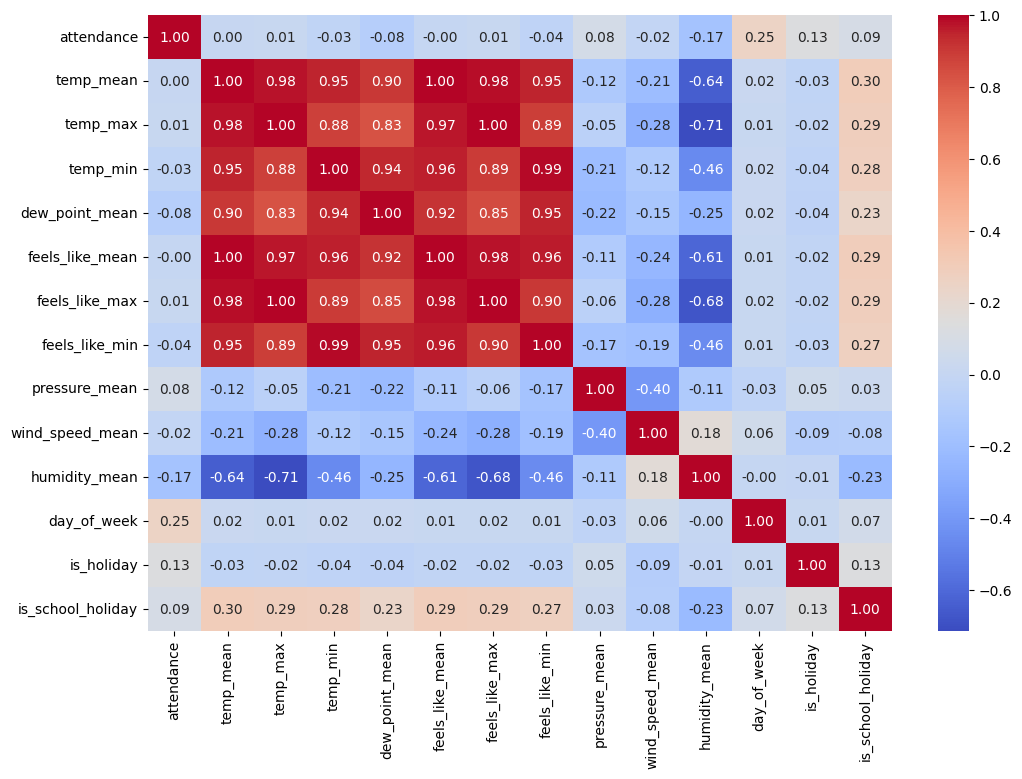

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(fdf_tivoli1.corr(), annot=True, fmt=".2f", cmap="coolwarm")

In [104]:
fdf_tivoli1.drop(columns=['feels_like_mean', 'feels_like_max', 'feels_like_min', 'temp_max', 'temp_min'], inplace=True)

print(fdf_tivoli1.head(10))

   attendance  temp_mean  dew_point_mean  pressure_mean  wind_speed_mean  \
0       20420  17.887500       16.172083    1019.333333         2.472917   
1       29110  19.352500       14.966250    1019.458333         1.468750   
2       23727  20.275833       14.882083    1016.375000         2.939167   
3       15115  20.721667       15.885000    1011.166667         2.471250   
4       16373  18.089583       15.442500    1011.000000         3.377917   
5       15831  17.604167       14.997917    1011.250000         2.007917   
6       16587  20.475417       16.730417    1014.958333         2.441250   
7       16434  19.728333       16.358750    1014.041667         2.581250   
8       25776  18.730833       15.368333    1012.875000         2.258333   
9       34376  19.161250       17.328750    1011.416667         1.596667   

   humidity_mean  day_of_week  is_holiday  is_school_holiday  
0      89.916667            4           0                  0  
1      77.541667            5        

In [106]:
fdf_tivoli1['is_weekend'] = (fdf_tivoli1['day_of_week'] >= 5).astype(int)

print(fdf_tivoli1.head(10))

   attendance  temp_mean  dew_point_mean  pressure_mean  wind_speed_mean  \
0       20420  17.887500       16.172083    1019.333333         2.472917   
1       29110  19.352500       14.966250    1019.458333         1.468750   
2       23727  20.275833       14.882083    1016.375000         2.939167   
3       15115  20.721667       15.885000    1011.166667         2.471250   
4       16373  18.089583       15.442500    1011.000000         3.377917   
5       15831  17.604167       14.997917    1011.250000         2.007917   
6       16587  20.475417       16.730417    1014.958333         2.441250   
7       16434  19.728333       16.358750    1014.041667         2.581250   
8       25776  18.730833       15.368333    1012.875000         2.258333   
9       34376  19.161250       17.328750    1011.416667         1.596667   

   humidity_mean  day_of_week  is_holiday  is_school_holiday  is_weekend  
0      89.916667            4           0                  0           0  
1      77.541

In [107]:
fdf_tivoli2 = fdf_tivoli1.drop('day_of_week', axis = 1)

print(fdf_tivoli2.head(10))

   attendance  temp_mean  dew_point_mean  pressure_mean  wind_speed_mean  \
0       20420  17.887500       16.172083    1019.333333         2.472917   
1       29110  19.352500       14.966250    1019.458333         1.468750   
2       23727  20.275833       14.882083    1016.375000         2.939167   
3       15115  20.721667       15.885000    1011.166667         2.471250   
4       16373  18.089583       15.442500    1011.000000         3.377917   
5       15831  17.604167       14.997917    1011.250000         2.007917   
6       16587  20.475417       16.730417    1014.958333         2.441250   
7       16434  19.728333       16.358750    1014.041667         2.581250   
8       25776  18.730833       15.368333    1012.875000         2.258333   
9       34376  19.161250       17.328750    1011.416667         1.596667   

   humidity_mean  is_holiday  is_school_holiday  is_weekend  
0      89.916667           0                  0           0  
1      77.541667           0           

In [83]:
!{sys.executable} -m pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 11.3 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 10.5 MB/s eta 0:00:00a 0:00:01


In [108]:
from sklearn.model_selection import train_test_split

X = fdf_tivoli2.drop(columns=['attendance']) 
y = fdf_tivoli2['attendance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_S_scaled = scaler.fit_transform(X)

In [113]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_N_scaled = scaler.fit_transform(X)